In [32]:
import pandas as pd
import numpy as np

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

In [3]:
focus = pd.read_parquet('Focus_playlist.parquet')

In [146]:
focus

,Album_name,Principle_Artist,Secondary_Artist,Album_release_date,Duration_total_seconds,Duration_minutes_part,Duration_seconds_part,popularity,index
name,,,,,,,,,
Golden Light,Nocturne Ep,Keeno,None,2013-12-09,449,7,29,0,0
Voyager - Original,Voyager,Betoko,None,2010-01-04,493,8,13,1,1
From Home,Past Is Prologue,Tycho,None,2006,391,6,31,0,2
Sunrise Projector,Past Is Prologue,Tycho,None,2006,184,3,4,0,3
Dictaphone’s Lament,Past Is Prologue,Tycho,None,2006,310,5,10,0,4
...,...,...,...,...,...,...,...,...,...
Kilauea,Kilauea,Bensley,None,2019-04-19,323,5,23,3,758
Cryogen,Cryogen,daniel hayn,Israel Strom,2022-03-25,202,3,22,25,759
Gymnopédie No. 1,Erik Satie & Friends,Erik Satie,Philippe Entremont,1949,205,3,25,69,760


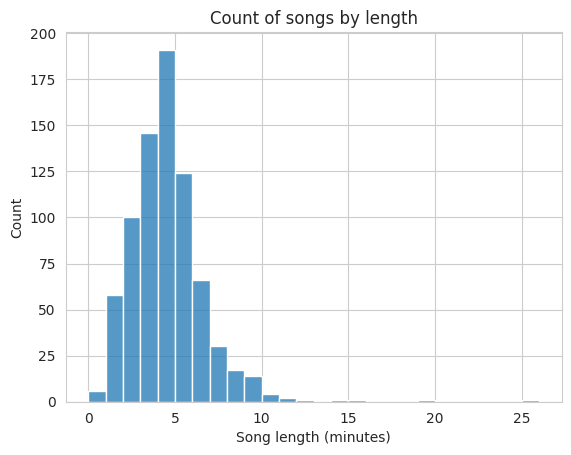

In [204]:
sns.histplot((focus.Duration_total_seconds/60), bins=range(27))
plt.xlabel('Song length (minutes)')
plt.title('Count of songs by length')
plt.savefig('duration_hist.png')
plt.show()

In [39]:
first_artist = focus.groupby('Principle_Artist').count()['index'].sort_values()

In [60]:
top_artists = first_artist.iloc[::-1].head(8)

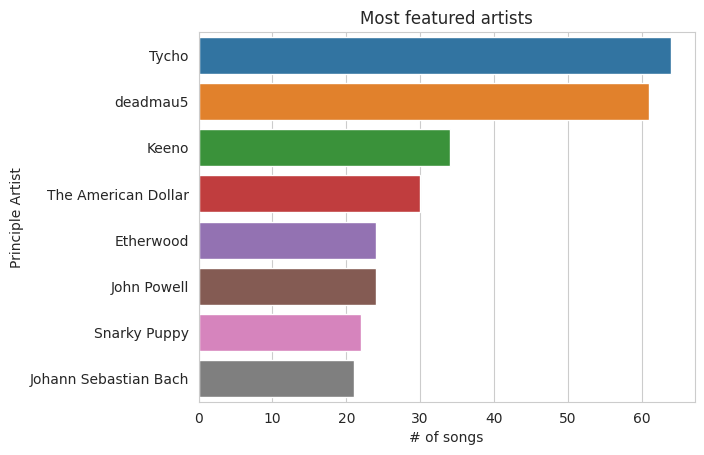

In [211]:
sns.barplot(y=top_artists.index, x=top_artists.values, orient='h')
plt.ylabel('Principle Artist')
plt.xlabel('# of songs')
plt.title('Most featured artists')
plt.savefig('featured_artists.png', bbox_inches='tight')
plt.show()

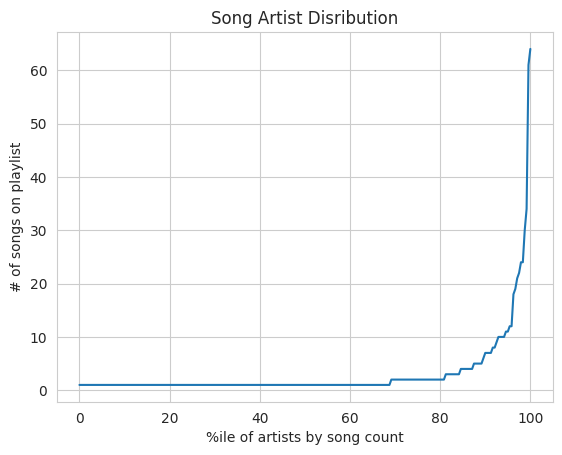

In [212]:
sns.lineplot(x=np.linspace(0, 100, len(first_artist)), y=first_artist)
plt.title('Song Artist Disribution')
plt.xlabel('%ile of artists by song count')
plt.ylabel('# of songs on playlist')
plt.savefig('prolific_artists_distribution.png')
plt.show()

In [213]:
popular_artists = focus.groupby('Principle_Artist').mean()['popularity'].sort_values(ascending=False).head(12)

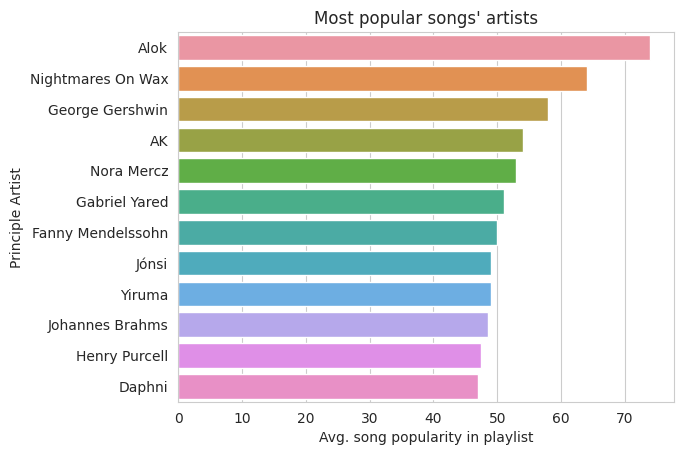

In [214]:
sns.barplot(y=popular_artists.index, x=popular_artists.values, orient='h')
plt.ylabel('Principle Artist')
plt.xlabel('Avg. song popularity in playlist')
plt.title("Most popular songs' artists")
plt.savefig('featured_popular_artists.png', bbox_inches='tight')
plt.show()

In [94]:
artist_pairs = list(focus[~focus.Secondary_Artist.isna()][['Principle_Artist','Secondary_Artist']].itertuples(index=False, name=None))

In [198]:
import networkx as nx 

G=nx.Graph()
G.add_edges_from(artist_pairs)

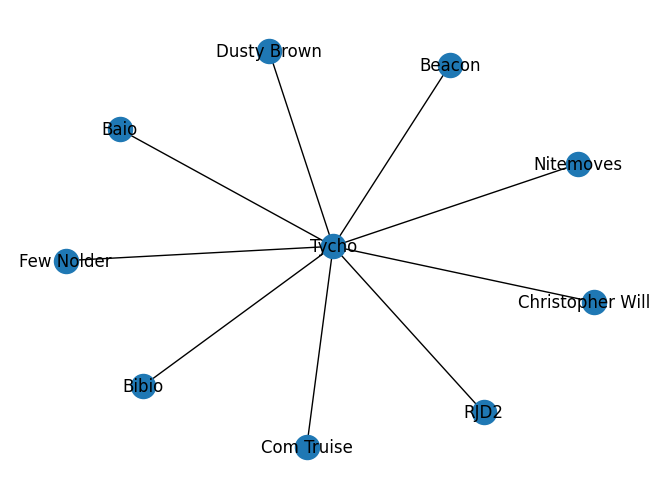

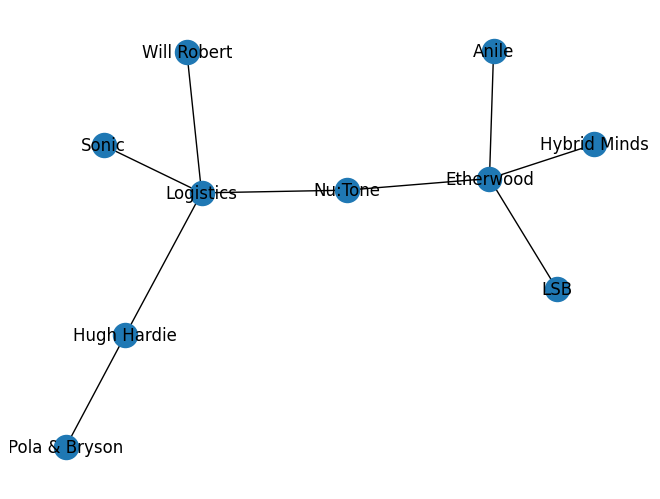

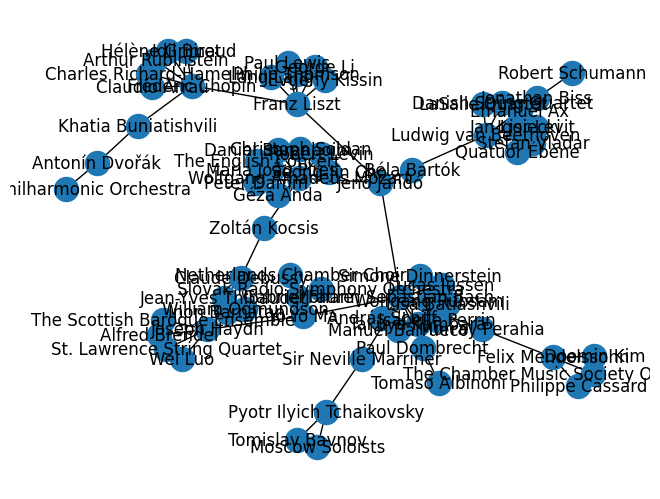

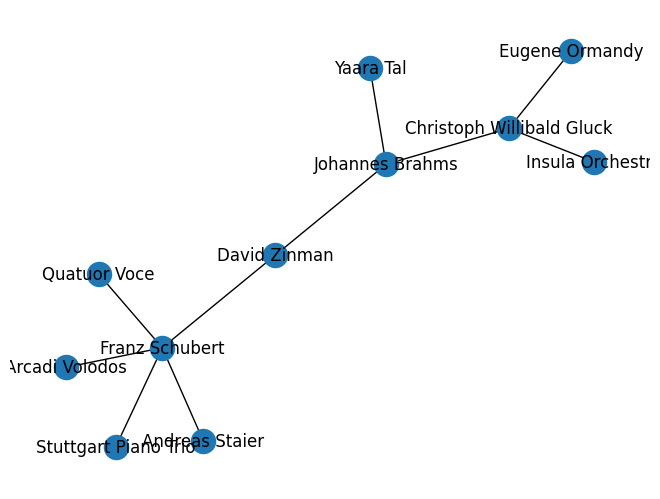

In [199]:
big_graphs = []

for c in nx.connected_components(G):
    subgraph = G.subgraph(c)
    if len(subgraph) > 8:
        nx.draw(G.subgraph(c), with_labels=True)
        plt.show()
        big_graphs.append(subgraph)

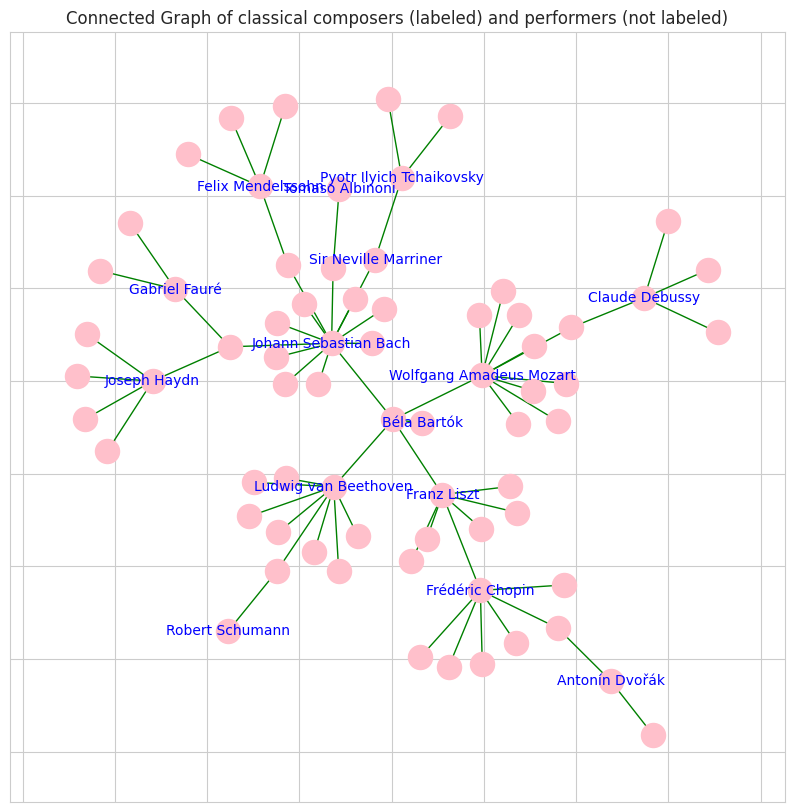

In [219]:
big_classical_graph = big_graphs[2]
labels={}
pos = nx.nx_agraph.graphviz_layout(big_classical_graph)
plt.figure(figsize=(10, 10))
for node in big_classical_graph.nodes():
    if node in set(focus.Principle_Artist):
        labels[node] = node
nx.draw_networkx_nodes(big_classical_graph,pos, node_color='pink')
nx.draw_networkx_edges(big_classical_graph,pos, edge_color='green')
nx.draw_networkx_labels(big_classical_graph,pos=pos,labels=labels,font_size=10,font_color='b')
plt.title('Connected Graph of classical composers (labeled) and performers (not labeled)')
plt.savefig('classical_artist_graph.png', bbox_inches='tight')
plt.show()

In [202]:
#sns.scatterplot(data=focus, y='Duration_total_seconds', x='popularity')

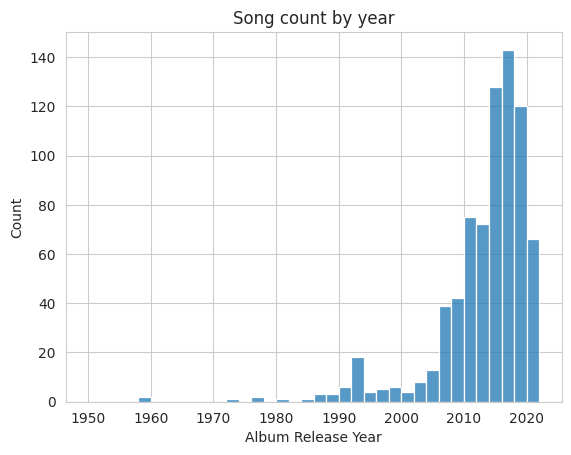

In [220]:
sns.histplot(pd.to_datetime(focus.Album_release_date).dt.year, bins=range(1950,2023,2))
plt.title('Song count by year')
plt.xlabel('Album Release Year')
plt.savefig('year_hist.png', bbox_inches='tight')
plt.show()